#KNN (K-NEAREST NEIGHBORS)

In [ ]:
import pandas as pd
import numpy as np
df=pd.DataFrame({'Age':[25,34,43,59,41,35,48,78,61,45],
                'Salary':[55,20,78,45,64,80,35,20,90,45],
                'Loan_S':['1','0','1','0','1','1','0','0','1','1']})
df

,Age,Salary,Loan_S
0,25,55,1
1,34,20,0
2,43,78,1
3,59,45,0
4,41,64,1
5,35,80,1
6,48,35,0
7,78,20,0
8,61,90,1
9,45,45,1


In [ ]:
x_train=df.loc[:6,['Age','Salary']]
x_train

,Age,Salary
0,25,55
1,34,20
2,43,78
3,59,45
4,41,64
5,35,80
6,48,35


In [ ]:
x_test=df.loc[7:,['Age','Salary']]
x_test

,Age,Salary
7,78,20
8,61,90
9,45,45


In [ ]:
y_train=df.loc[:6,['Loan_S']]
y_train

,Loan_S
0,1
1,0
2,1
3,0
4,1
5,1
6,0


In [ ]:
y_test=df.loc[7:,['Loan_S']]
y_test

,Loan_S
7,0
8,1
9,1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['0', '1', '0'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6666666666666666

In [ ]:
x=np.array([56,20])
print(knn.predict([x]))

['0']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
print((cm[0,0]+cm[1,1])/sum(sum(cm)))

[[1 0]
 [1 1]]
0.6666666666666666


#RANDOM SPLITTING

In [ ]:
X=df[['Age','Salary']]
Y=df['Loan_S']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=1)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_test_pred=knn.predict(X_test)
print(accuracy_score(Y_test,y_test_pred))

0.75


#IRIS DATA

In [ ]:
iris=pd.read_csv('/content/iris_data.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
ir_x=iris.drop(['Id','Species'],axis=1)
ir_y=iris['Species']

In [ ]:
ir_x_train,ir_x_test,ir_y_train,ir_y_test=train_test_split(ir_x,ir_y,test_size=0.3,random_state=3)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(ir_x_train,ir_y_train)
ir_y_pred=knn.predict(ir_x_test)
print(accuracy_score(ir_y_test,ir_y_pred))

0.9555555555555556


# AVG ACCURACY BY EXECUTING KNN WITH DIFF RANDOM STATE





In [ ]:
acc=[]
for i in range(1,11):
  _X_train,_X_test,_Y_train,_Y_test=train_test_split(ir_x,ir_y,test_size=0.3,random_state=i)
  knn=KNeighborsClassifier(n_neighbors=3)
  knn.fit(_X_train,_Y_train)
  _y_test_pred=knn.predict(_X_test)
  acc.append(accuracy_score(_Y_test,_y_test_pred))
avg_acc=np.sum(acc)/len(acc)
print(avg_acc)

0.9666666666666668


# CHECK ACCURACY BY FIXING RANDOM STATE AND CHANGING THE K VALUE


In [ ]:
ir_x_train,ir_x_test,ir_y_train,ir_y_test=train_test_split(ir_x,ir_y,test_size=0.3,random_state=3)
def acc_diffk(k_values,ir_x_train,ir_x_test,ir_y_train,ir_y_test):
  k_acc=[]
  for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(ir_x_train,ir_y_train)
    ir_y_pred=knn.predict(ir_x_test)
    k_acc.append(accuracy_score(ir_y_test,ir_y_pred))
  return k_acc
k_values=range(1,21)
k_acc=acc_diffk(k_values,ir_x_train,ir_x_test,ir_y_train,ir_y_test)
print(k_values)
print(k_acc)

range(1, 21)
[0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9333333333333333]


In [ ]:
df_ir=pd.DataFrame({'K':k_values,'Accuracy':k_acc})
df_ir

,K,Accuracy
0,1,0.955556
1,2,0.955556
2,3,0.955556
3,4,0.955556
4,5,0.955556
5,6,0.955556
6,7,0.955556
7,8,0.955556
8,9,0.977778
9,10,0.955556


# PLOT THE OUTPUT(X=K VALUE,Y=ACC VALUE)


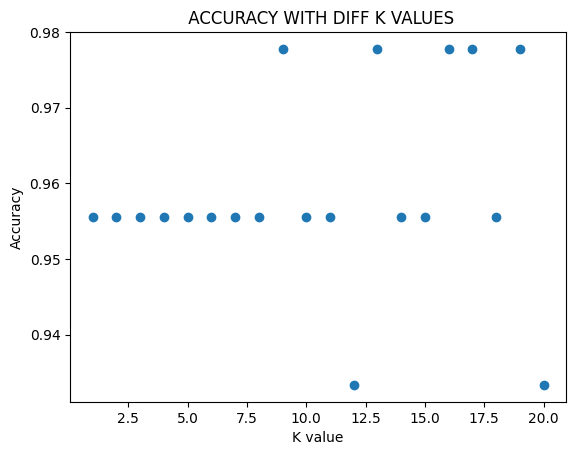

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_ir['K'],df_ir['Accuracy'])
plt.title(' ACCURACY WITH DIFF K VALUES')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

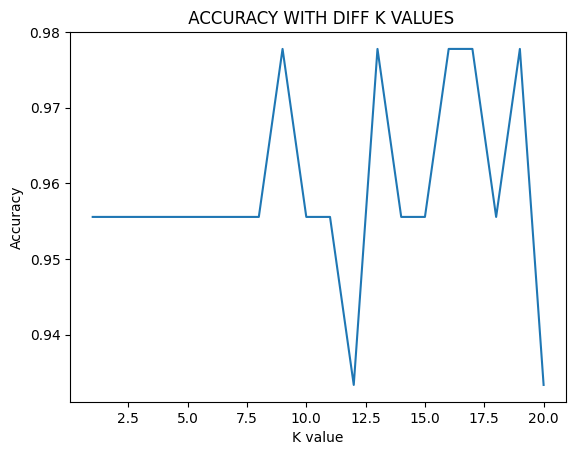

In [ ]:
plt.plot(df_ir['K'],df_ir['Accuracy'])
plt.title(' ACCURACY WITH DIFF K VALUES')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()